# git clone https://github.com/yzpt/module_pandas_B2

## partage wifi : SSID: allo / password: gema_59!

#### VSCODE : installer les extensions suivantes :
* jupyter
* python


# Création d'un environnement virtuel
Dans le terminal, taper :

```bash

python3 -m venv venv_module_pandas_B2
source venv_module_pandas_B2/bin/activate

pip install ipykernel matplotlib pandas numpy
```

### Sauvegarder un fichier sous format notebook : mon_fichier.ipynb

# Analyser le fichier 'data/client.csv'

### S'appuyer la démarche exposée en 2.0.gapminder_analysis.ipynb
* charger le fichier
* supprimer les doublons
* supprimer les lignes avec des valeurs manquantes si besoin
* effectuer quelques graphiques, distributions en histogramme
* effectuer quelques groupements : purchasemount groupé par région
* effectuer quelques tris
* calculer une matrice de corrélation, afficher la heatmap et ainsi définir des corrélations entre des varibales
* effectuer une analyse bi-variée des valeurs en corrélations précédemment detectées

In [14]:
import pandas as pd
df = pd.read_csv('data/clients.csv')
df.head()

,ClientID,Age,AnnualIncome,PurchaseAmount,PurchaseFrequency,CustomerSatisfaction,Region,Ville,Latitude,Longitude,Population,Altitude,DiscountApplied,OrderMethod,PaymentMethod,TimeOfDay,ShippingCost
0,Client_32056,31.0,26403.674158,191.314788,2.708355,0.492442,NaN,Saliès,43.891,2.129,825.0,224.0,True,In-store,PayPal,Morning,1.207788
1,Client_34948,68.0,17408.155793,646.185165,2.964834,1.607596,La Réunion,Saint-André,-20.960,55.650,57150.0,173.0,False,Online,PayPal,Afternoon,12.854471
2,Client_5951,52.0,32291.888915,185.147826,3.226064,1.636991,NaN,Saint-Vaize,45.812,-0.632,NaN,28.0,False,Online,Credit Card,Evening,NaN
3,Client_34865,NaN,NaN,702.761734,5.152342,-1.123563,NaN,Goyave,16.133,-61.575,7638.0,252.0,False,Online,Credit Card,Afternoon,7.570169
4,Client_34895,40.0,NaN,748.044013,5.130853,2.103865,Martinique,Gros-Morne,14.710,NaN,9876.0,273.0,True,Online,Credit Card,Afternoon,17.071825


In [15]:
df[df.duplicated() == True]

,ClientID,Age,AnnualIncome,PurchaseAmount,PurchaseFrequency,CustomerSatisfaction,Region,Ville,Latitude,Longitude,Population,Altitude,DiscountApplied,OrderMethod,PaymentMethod,TimeOfDay,ShippingCost


In [16]:
print('nombre de lignes avant dropna :', df.shape[0])
df.dropna(inplace=True)
print('nombre de lignes après dropna :', df.shape[0])

nombre de lignes avant dropna : 1000
nombre de lignes après dropna : 258


In [17]:
df

,ClientID,Age,AnnualIncome,PurchaseAmount,PurchaseFrequency,CustomerSatisfaction,Region,Ville,Latitude,Longitude,Population,Altitude,DiscountApplied,OrderMethod,PaymentMethod,TimeOfDay,ShippingCost
1,Client_34948,68.0,17408.155793,646.185165,2.964834,1.607596,La Réunion,Saint-André,-20.960,55.650,57150.0,173.0,False,Online,PayPal,Afternoon,12.854471
6,Client_34964,37.0,4822.524415,1509.272851,5.681341,-1.802591,Mayotte,Acoua,-12.724,45.059,5192.0,180.0,False,Mobile App,Bank Transfer,Evening,-0.633544
7,Client_32176,77.0,39155.150625,679.979172,0.733870,-1.523658,Tarn-et-Garonne,Glatens,43.893,0.917,69.0,204.0,False,Online,PayPal,Afternoon,9.173135
13,Client_25393,47.0,46921.309837,1912.682271,0.947428,-1.000612,Pyrénées-Atlantiques,Urdos,42.872,-0.555,68.0,1596.0,False,In-store,PayPal,Afternoon,5.303424
17,Client_32647,44.0,31418.950767,435.146976,1.608587,6.351830,Vendée,Chantonnay,46.687,-1.050,8447.0,74.0,True,In-store,Credit Card,Morning,20.485484
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
966,Client_30484,26.0,30026.869067,339.538398,1.283944,4.258863,Seine-et-Marne,Villenoy,48.944,2.865,5019.0,63.0,True,Mobile App,Bank Transfer,Morning,5.506138
980,Client_25530,30.0,12187.093805,2084.662862,2.295357,5.307206,Hautes-Pyrénées,Camparan,42.838,0.355,53.0,1224.0,False,In-store,Credit Card,Afternoon,24.707321
981,Client_25396,24.0,45450.966332,277.923798,0.973163,5.100354,Pyrénées-Atlantiques,Urrugne,43.362,-1.700,10543.0,119.0,True,Mobile App,Bank Transfer,Afternoon,4.653316
985,Client_11651,49.0,41208.494350,318.891947,2.153210,0.299759,Haute-Garonne,Muret,43.462,1.331,25060.0,189.0,False,Online,PayPal,Morning,12.705224


<Axes: >

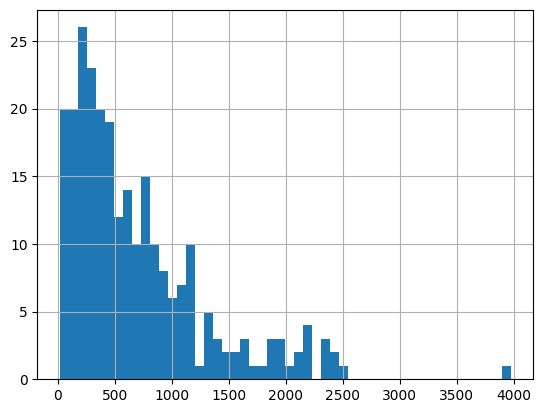

In [18]:
df['PurchaseAmount'].hist(bins=50)

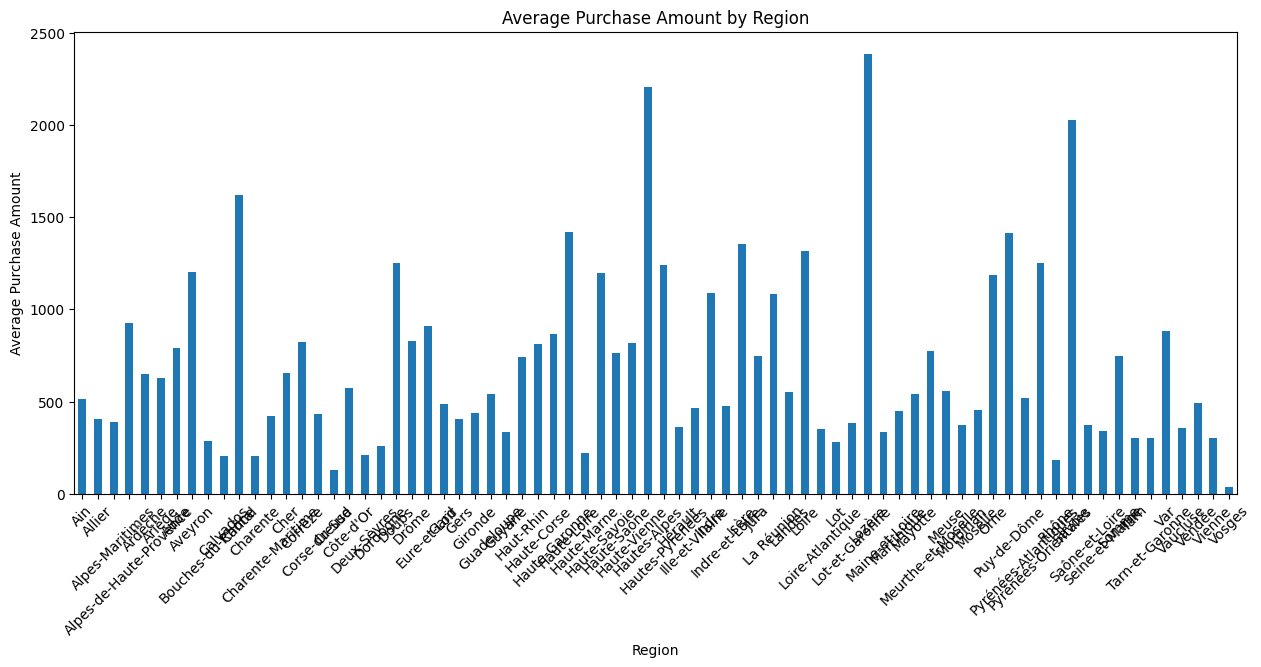

In [31]:
df.groupby(by='Region')['PurchaseAmount']

# plot the average purchase amount by region using matplotlib
import matplotlib.pyplot as plt
# size 15,6
plt.figure(figsize=(15,6))
df.groupby(by='Region')['PurchaseAmount'].mean().plot(kind='bar')
# pivoter de 45° les labels de l'axe x
plt.xticks(rotation=45)
plt.ylabel('Average Purchase Amount')
plt.title('Average Purchase Amount by Region')
plt.show()

# Car dataset

In [41]:
df = pd.read_csv('data/car.csv')
df.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [45]:
pd.set_option('display.max_rows', 100)

In [47]:
df_temp = df[0:80]
df_temp

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500
5,BMW,1 Series,2012,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,31200
6,BMW,1 Series,2012,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,26,17,3916,44100
7,BMW,1 Series,2012,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,39300
8,BMW,1 Series,2012,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,36900
9,BMW,1 Series,2013,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,27,18,3916,37200


In [49]:
df['Make'].unique()

array(['BMW', 'Audi', 'FIAT', 'Mercedes-Benz', 'Chrysler', 'Nissan',
       'Volvo', 'Mazda', 'Mitsubishi', 'Ferrari', 'Alfa Romeo', 'Toyota',
       'McLaren', 'Maybach', 'Pontiac', 'Porsche', 'Saab', 'GMC',
       'Hyundai', 'Plymouth', 'Honda', 'Oldsmobile', 'Suzuki', 'Ford',
       'Cadillac', 'Kia', 'Bentley', 'Chevrolet', 'Dodge', 'Lamborghini',
       'Lincoln', 'Subaru', 'Volkswagen', 'Spyker', 'Buick', 'Acura',
       'Rolls-Royce', 'Maserati', 'Lexus', 'Aston Martin', 'Land Rover',
       'Lotus', 'Infiniti', 'Scion', 'Genesis', 'HUMMER', 'Tesla',
       'Bugatti'], dtype=object)

In [50]:
df['Make'].nunique()

48

In [53]:
# GRouper le nombre de voitures par marque

df.groupby(by='Make')['Make'].count()

Make
Acura             252
Alfa Romeo          5
Aston Martin       93
Audi              328
BMW               334
Bentley            74
Bugatti             3
Buick             196
Cadillac          397
Chevrolet        1123
Chrysler          187
Dodge             626
FIAT               62
Ferrari            69
Ford              881
GMC               515
Genesis             3
HUMMER             17
Honda             449
Hyundai           303
Infiniti          330
Kia               231
Lamborghini        52
Land Rover        143
Lexus             202
Lincoln           164
Lotus              29
Maserati           58
Maybach            16
Mazda             423
McLaren             5
Mercedes-Benz     353
Mitsubishi        213
Nissan            558
Oldsmobile        150
Plymouth           82
Pontiac           186
Porsche           136
Rolls-Royce        31
Saab              111
Scion              60
Spyker              3
Subaru            256
Suzuki            351
Tesla              18
Toyot

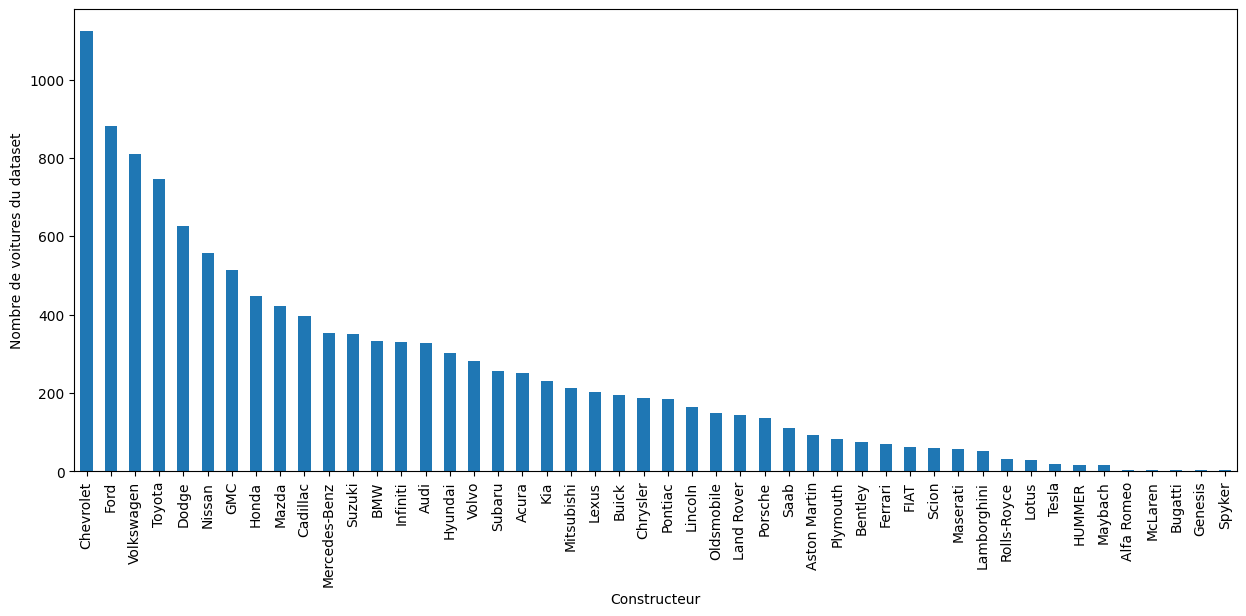

In [58]:
# matplotlib: plot df.groupby(by='Make')['Make'].count()
plt.figure(figsize=(15,6))
df.groupby(by='Make')['Make'].count().sort_values(ascending=False).plot(kind='bar')
plt.xticks(rotation=90)
plt.xlabel('Constructeur')
plt.ylabel('Nombre de voitures du dataset')
plt.show()

In [60]:
df.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [63]:
# Sélectionner les colonnes quantitatives (numériques)
quantitative_columns = ['Year', 'Engine HP', 'Engine Cylinders', 'Number of Doors', 'highway MPG', 'city mpg', 'Popularity', 'MSRP']


matrice_de_correlation = df[quantitative_columns].corr() # pearson par défaut
matrice_de_correlation = df[quantitative_columns].corr(method='pearson')
# matrice_de_correlation = df[quantitative_columns].corr(method='spearman')
matrice_de_correlation

,Year,Engine HP,Engine Cylinders,Number of Doors,highway MPG,city mpg,Popularity,MSRP
Year,1.000000,0.351794,-0.041479,0.263787,0.258240,0.198171,0.073049,0.227590
Engine HP,0.351794,1.000000,0.779988,-0.102713,-0.406563,-0.439371,0.037501,0.662008
Engine Cylinders,-0.041479,0.779988,1.000000,-0.140088,-0.621606,-0.600776,0.041145,0.531312
Number of Doors,0.263787,-0.102713,-0.140088,1.000000,0.118570,0.120881,-0.048272,-0.126635
highway MPG,0.258240,-0.406563,-0.621606,0.118570,1.000000,0.886829,-0.020991,-0.160043
city mpg,0.198171,-0.439371,-0.600776,0.120881,0.886829,1.000000,-0.003217,-0.157676
Popularity,0.073049,0.037501,0.041145,-0.048272,-0.020991,-0.003217,1.000000,-0.048476
MSRP,0.227590,0.662008,0.531312,-0.126635,-0.160043,-0.157676,-0.048476,1.000000


<Axes: >

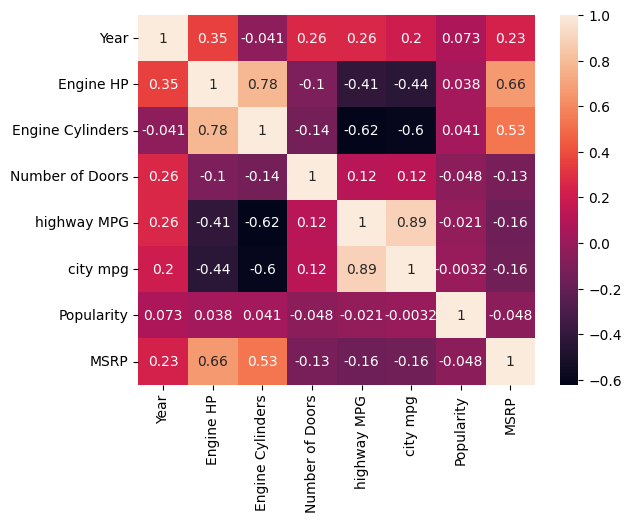

In [62]:
import seaborn as sns
sns.heatmap(df[quantitative_columns].corr(), annot=True)

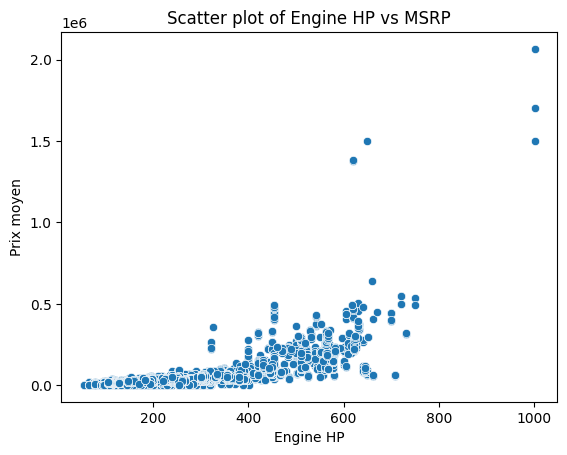

In [68]:
sns.scatterplot(x='Engine HP', y='MSRP', data=df)
plt.title('Scatter plot of Engine HP vs MSRP')
plt.xlabel('Engine HP')
plt.ylabel('Prix moyen')
plt.show()

In [71]:
df = df.dropna()

In [72]:
from sklearn.linear_model import LinearRegression

# Créer un modèle de régression linéaire
model = LinearRegression()

X = df[['Engine HP']]  # double crochets car dataframe nécessaire en entrée
y = df['MSRP']        # MSRP = prix conseillé

model.fit(X, y)

LinearRegression()

In [73]:
# Afficher les paramètres du modèle
slope, intercept = model.coef_[0], model.intercept_
print(f"Modèle de régression : y = {slope:.2f} * x + {intercept:.2f}")

Modèle de régression : y = 401.37 * x + -60160.44


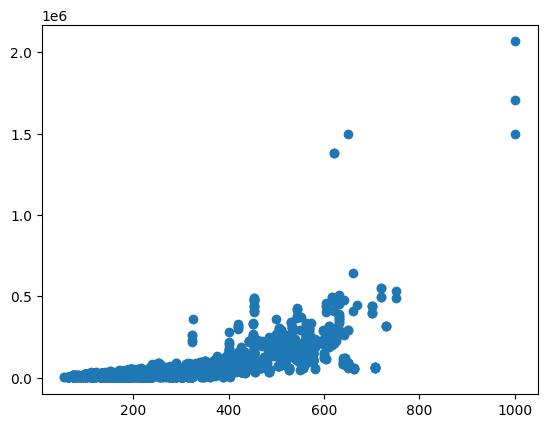

In [74]:
plt.scatter(X, y)

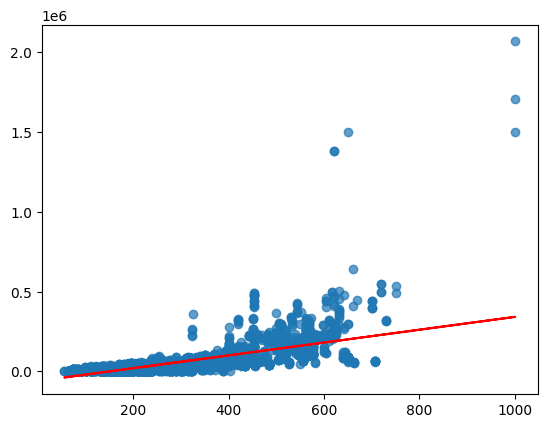

In [79]:
# Visualisation de la droite de régression
y_pred = model.predict(X)
plt.scatter(X, y, alpha=0.7)
plt.plot(X, y_pred, color='red')

In [81]:
# Prédiction de l'espérance de vie en 2020
X_pred_900 = pd.DataFrame([[900]], columns=['Engine HP'])
y_pred_900 = model.predict(X_pred_900)
print(f"Prédiction ddu prix pour 900hop : {y_pred_900[0]:.2f}")

Prédiction ddu prix pour 900hop : 301071.73


# https://storage.googleapis.com/yohann-zapart/structure_pop_2021.csv

In [92]:
df_pop = pd.read_csv('data/structure_pop_2021.csv', sep=';')

/tmp/ipykernel_5179/378629678.py:1: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df_pop = pd.read_csv('data/structure_pop_2021.csv', sep=';')


# Question : établir le classement des 10 villes qui ont le plus de jeunes garçons (entre 15 et 29 ans)

In [91]:
pd.set_option('display.max_rows', 500)
pd.DataFrame(df_pop.columns)


# colonnes d'intérêt :

# CODGEO : code INSEE de la commune
# P21_POP : population totale en 2021
# P21_POP014 : population de moins de 14 ans en 2021
# ...
# P21_POPH : population d'hommes en 2021
# P21_POPF : population de femmes en 2021
# ...
# P21_POPF1529 : population de femmes de 15 à 29 ans en 2021
# ...

,0
0,CODGEO
1,P21_POP
2,P21_POP0014
3,P21_POP1529
4,P21_POP3044
5,P21_POP4559
6,P21_POP6074
7,P21_POP7589
8,P21_POP90P
9,P21_POPH


In [ ]:
df_pop = df_pop[['CODGEO', '']]